In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from utils.metrics import (
    threshold_at_completeness_of,
    threshold_at_purity_of,
    get_purity,
    get_completeness,
    bayes_conf,
    get_interval,
    get_bayes_interval,
    calibration_error
    )

In [3]:
cnn_true = np.load("clens_test_labels.npy")
y_true = 1.0 - cnn_true # make star = 0 and galaxy = 1

In [4]:
cnn_pred = np.load("clens_convnet_pred.npy")
cnn_pred = 1.0 - cnn_pred # make star = 0 and galaxy = 1

In [5]:
phot = pd.read_csv('clens_tpc.0.mlz', sep=' ', skiprows=1, usecols=(0, 2), names=('true', 'pred'))
phot_pred = 1.0 - phot.pred.values # make galaxy=0 and star=1

In [6]:
morph = pd.read_csv('clens_tpc.1.mlz', sep=' ', skiprows=1, usecols=(0, 2), names=('true', 'pred'))
morph_pred = 1.0 - morph.pred.values # make galaxy=0 and star=1

In [7]:
df = pd.read_csv("clens_test.csv")
y_fields = [
    'W1m0m4', 'W1m1m4', 'W1m2m4', 'W1m3m4', 'W1m4m4',
    'W1p1m4', 'W1p1p1', 'W1p2m4', 'W1p3m4', 'W1p3p1',
    'W1p4m4', 'W3m0m1', 'W3m2m1', 'W3m2p1', 'W3p2m3',
    'W4m1p1', 'W4m1p2', 'W4m1p3', 'W4m2p2', 'W4m2p3',
    'W4m3p3'
    ]
mag_i = df["MAG_i"].values
mask = (df["field"].isin(y_fields).values)
mag_i[mask] = df[mask]["MAG_y"].values

In [8]:
mask = ((mag_i > -90) & (mag_i < 90))
mag_i, y_true, cnn_pred, phot_pred, morph_pred = map(
    lambda x: x[mask],
    [mag_i, y_true, cnn_pred, phot_pred, morph_pred]
)

In [9]:
n_bins = 10
p_gal_low, p_gal_med, p_gal_high = get_bayes_interval(y_true, cnn_pred, n_bins=n_bins, step=0.01)
p_sg_low, p_sg_med, p_sg_high = get_interval(cnn_pred, n_bins=n_bins)

Done. N = 1565, k = 15, area: 0.683, alpha: 0.0082, beta: 0.0152
Done. N = 162, k = 17, area: 0.683, alpha: 0.0891, beta: 0.1398
Done. N = 78, k = 21, area: 0.684, alpha: 0.2281, beta: 0.3287
Done. N = 66, k = 20, area: 0.684, alpha: 0.2611, beta: 0.3762
Done. N = 41, k = 19, area: 0.684, alpha: 0.4032, beta: 0.5596
Done. N = 46, k = 21, area: 0.684, alpha: 0.4000, beta: 0.5480
Done. N = 36, k = 20, area: 0.683, alpha: 0.4874, beta: 0.6515
Done. N = 70, k = 51, area: 0.683, alpha: 0.6758, beta: 0.7810
Done. N = 117, k = 95, area: 0.682, alpha: 0.7834, beta: 0.8585
Done. N = 13121, k = 13070, area: 1.000, alpha: 0.9900, beta: 1.0000


/usr/local/lib/python3.4/dist-packages/scipy/integrate/quadpack.py:321: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


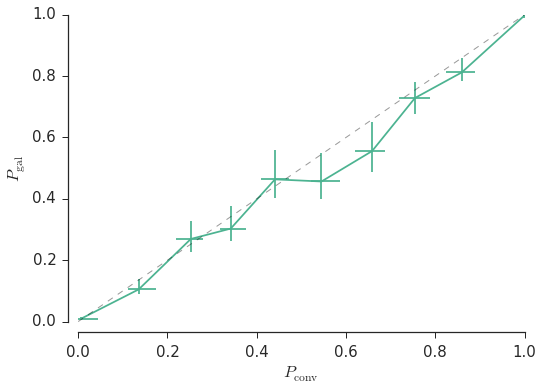

In [10]:
import seaborn as sns

sns.set(style="ticks", font_scale=1.5, color_codes=True)

fig, ax = plt.subplots()

sns.despine(trim=True, offset=10)

ax.errorbar(
    p_sg_med, p_gal_med, color="#4CB391",
    xerr=[p_sg_med - p_sg_low, p_sg_high - p_sg_med],
    yerr=[p_gal_med - p_gal_low, p_gal_high - p_gal_med]
)
ax.plot((0, 1), (0, 1), ls="--", color="#000000", alpha=0.4, linewidth=1)
ax.set_xlabel(r'$P_{\mathrm{conv}}$')
ax.set_ylabel(r'$P_{\mathrm{gal}}$')

plt.savefig('figures/clens_calibration_conv.pdf', bbox_inches='tight')

In [11]:
n_bins = 10
p_tpc_gal_low, p_tpc_gal_med, p_tpc_gal_high = get_bayes_interval(
    y_true, morph_pred,
    n_bins=n_bins, step=0.01
)
p_tpc_sg_low, p_tpc_sg_med, p_tpc_sg_high = get_interval(morph_pred, n_bins=n_bins)

Done. N = 908, k = 23, area: 0.682, alpha: 0.0214, beta: 0.0321
Done. N = 46, k = 13, area: 0.684, alpha: 0.2355, beta: 0.3706
Done. N = 32, k = 11, area: 0.683, alpha: 0.2765, beta: 0.4416
Done. N = 15, k = 5, area: 0.683, alpha: 0.2300, beta: 0.4600
Done. N = 22, k = 5, area: 0.683, alpha: 0.1680, beta: 0.3460
Done. N = 23, k = 10, area: 0.682, alpha: 0.3500, beta: 0.5500
Done. N = 26, k = 19, area: 0.684, alpha: 0.6500, beta: 0.8200
Done. N = 30, k = 14, area: 0.683, alpha: 0.3776, beta: 0.5540
Done. N = 65, k = 42, area: 0.684, alpha: 0.5920, beta: 0.7100
Done. N = 13290, k = 13207, area: 1.000, alpha: 0.9900, beta: 1.0000


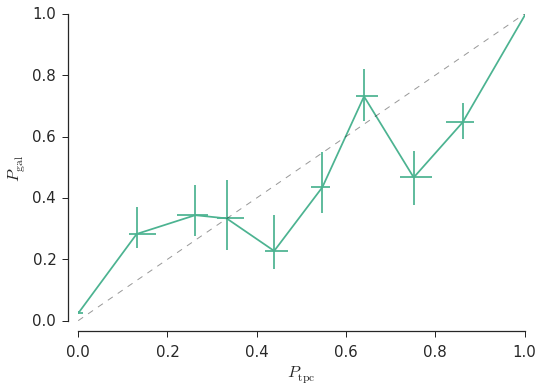

In [12]:
import seaborn as sns

sns.set(style="ticks", font_scale=1.5, color_codes=True)

fig, ax = plt.subplots()

sns.despine(trim=True, offset=10)

ax.errorbar(
    p_tpc_sg_med, p_tpc_gal_med, color="#4CB391",
    xerr=[p_tpc_sg_med - p_tpc_sg_low, p_tpc_sg_high - p_tpc_sg_med],
    yerr=[p_tpc_gal_med - p_tpc_gal_low, p_tpc_gal_high - p_tpc_gal_med]
)
ax.plot((0, 1), (0, 1), ls="--", color="#000000", alpha=0.4, linewidth=1)
ax.set_xlabel(r'$P_{\mathrm{tpc}}$')
ax.set_ylabel(r'$P_{\mathrm{gal}}$')

plt.savefig('figures/clens_calibration_tpc.pdf', bbox_inches='tight')

In [13]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true, cnn_pred))
print(roc_auc_score(y_true, morph_pred))
print(roc_auc_score(y_true, phot_pred))

0.994772003111
0.992362871475
0.987613152856


In [14]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true, cnn_pred))
print(mean_squared_error(y_true, morph_pred))
print(mean_squared_error(y_true, phot_pred))

0.0112067331932
0.0108846290027
0.0189261973971


In [15]:
cnn_p_cut, _ = threshold_at_completeness_of(y_true, cnn_pred, 0.96)
morph_p_cut, _ = threshold_at_completeness_of(y_true, morph_pred, 0.96)
phot_p_cut, _ = threshold_at_completeness_of(y_true, phot_pred, 0.96)

print(get_purity(y_true, cnn_pred, cnn_p_cut))
print(get_purity(y_true, morph_pred, morph_p_cut))
print(get_purity(y_true, phot_pred, phot_p_cut))

0.997198661583
0.996345540782
0.992717694453


In [16]:
cnn_p_cut, _ = threshold_at_purity_of(1 - y_true, 1 - cnn_pred, 0.97)
morph_p_cut, _ = threshold_at_purity_of(1 - y_true, 1 - morph_pred, 0.97)
phot_p_cut, _ = threshold_at_purity_of(1 - y_true, 1 - phot_pred, 0.97)

print(get_completeness(1 - y_true, 1 - cnn_pred, cnn_p_cut))
print(get_completeness(1 - y_true, 1- morph_pred, morph_p_cut))
print(get_completeness(1 - y_true, 1 - phot_pred, phot_p_cut))

0.89708141321
0.926779313876
0.804403481823


In [18]:
print(calibration_error(y_true, cnn_pred, 1000))
print(calibration_error(y_true, morph_pred, 1000))
print(calibration_error(y_true, phot_pred, 1000))

0.0197359178002
0.0244875952463
0.0265535296196


In [17]:
print(((y_true == 1).sum() - cnn_pred.sum()) / (y_true == 1).sum())
print(((y_true == 1).sum() - morph_pred.sum()) / (y_true == 1).sum())
print(((y_true == 1).sum() - phot_pred.sum()) / (y_true == 1).sum())

-0.00286683486114
-0.00564439283841
-0.0101491122931
